In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
pd.pandas.set_option('display.max_columns',None)

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
len(df.columns)

81

#### the shape of df

In [5]:
df.shape

(1460, 81)

### making the list of the columns that contains empty values

In [6]:
nan_values_columns = [features for features in df.columns if df[features].isna().sum()>1]

In [7]:
nan_values_columns

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [8]:
len(nan_values_columns)

18

In [9]:
for features in nan_values_columns:
    print(features ,np.round(df[features].isnull().mean(),4), "% missing values")

LotFrontage 0.1774 % missing values
Alley 0.9377 % missing values
MasVnrType 0.0055 % missing values
MasVnrArea 0.0055 % missing values
BsmtQual 0.0253 % missing values
BsmtCond 0.0253 % missing values
BsmtExposure 0.026 % missing values
BsmtFinType1 0.0253 % missing values
BsmtFinType2 0.026 % missing values
FireplaceQu 0.4726 % missing values
GarageType 0.0555 % missing values
GarageYrBlt 0.0555 % missing values
GarageFinish 0.0555 % missing values
GarageQual 0.0555 % missing values
GarageCond 0.0555 % missing values
PoolQC 0.9952 % missing values
Fence 0.8075 % missing values
MiscFeature 0.963 % missing values


## how to deal with these missing values we will check letter in feature engeering step
## now let's find the relationship with target variable (sales price) 

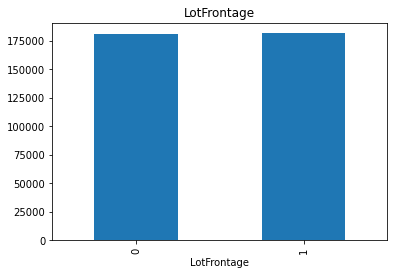

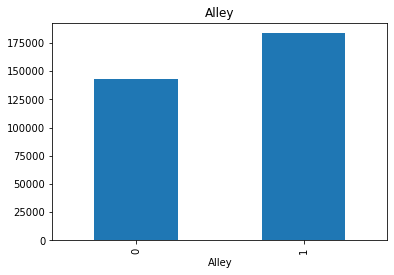

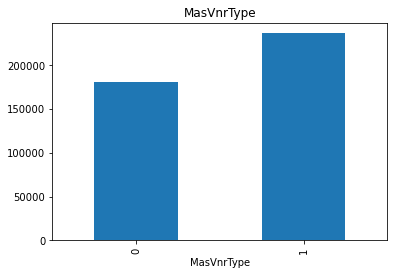

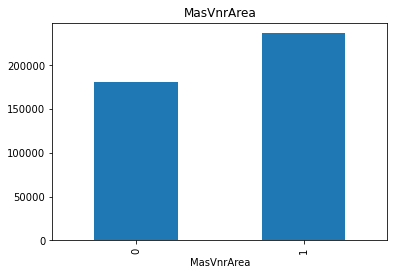

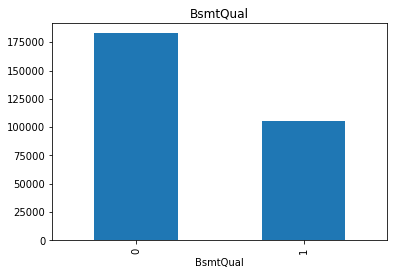

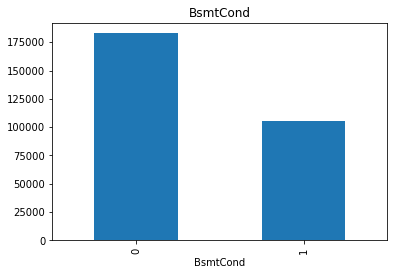

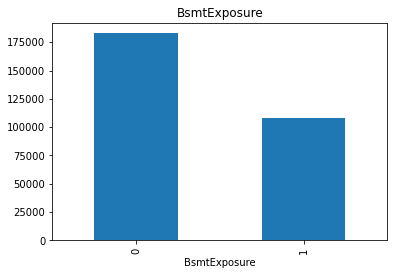

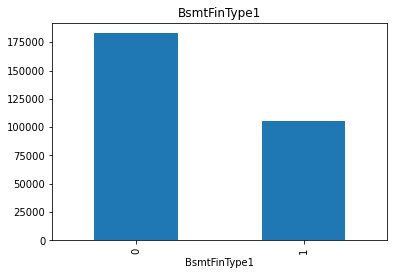

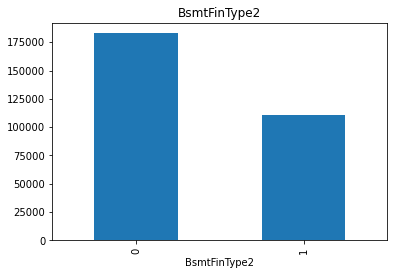

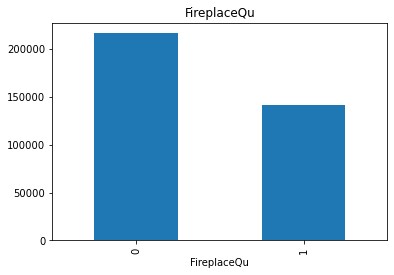

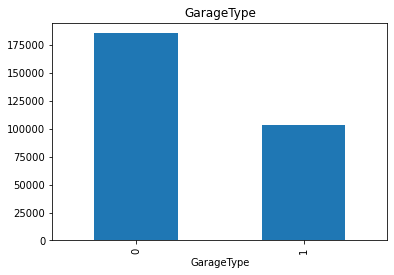

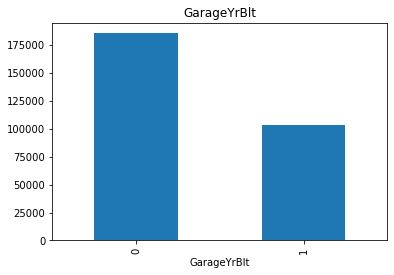

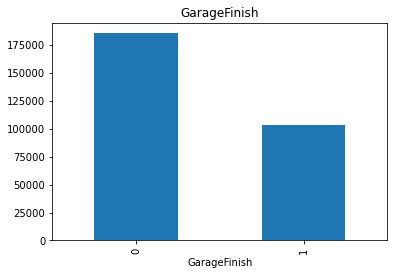

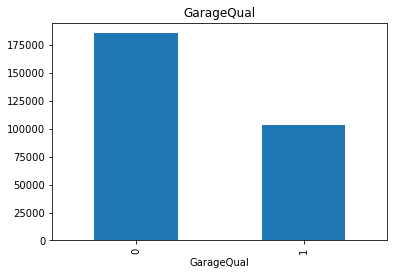

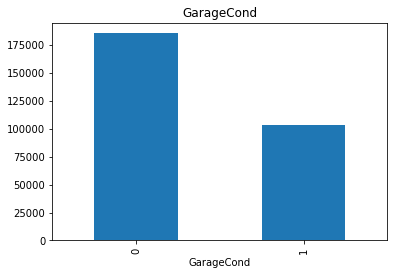

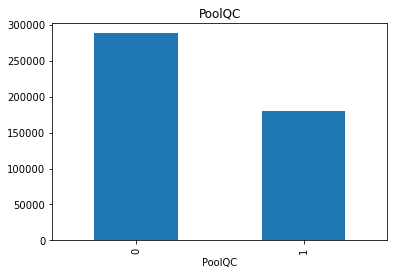

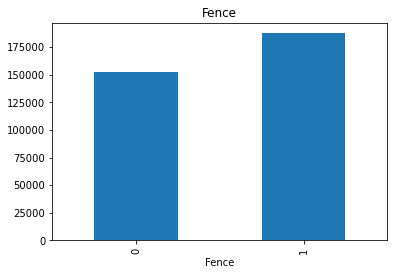

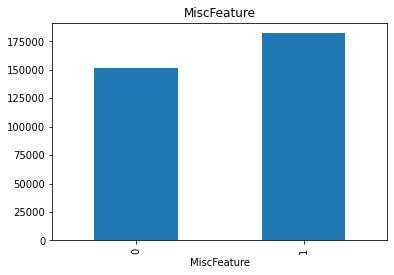

In [10]:
for features in nan_values_columns:
    data = df.copy()
    
    # where the value is null assign 1 here and 0 when value is not null
    data[features]= np.where(data[features].isnull(),1,0)
    ## print(data[features].head(30))
    
    #plot the graph (by group by we will get to categories one for 1 and sec for 0)
    data.groupby(features)['SalePrice'].mean().plot.bar()
    plt.title(features)
    plt.show()

#### As in the above plots we see that the in most of cases, if value is missing we have a high price so we need to fulfill it with care

## Now lets find the numerical values

In [11]:
numerical_values_columns = [features for features in df.columns if df[features].dtype != 'O']

In [12]:
print('len is :',len(numerical_values_columns))
numerical_values_columns

len is : 38


['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

## Temporal Variables (Eg: Datetime Variables)
From the Dataset we have 4 year variables. We have extract information from the datetime variables like no of years or no of days. One example in this specific scenario can be difference in years between the year the house was built and the year the house was sold. 

In [13]:
years_columns = [features for features in df.columns if "Yr" in features or "Year" in features]

In [14]:
print("length of the columns is :" ,len(years_columns))
years_columns

length of the columns is : 4


['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [15]:
## Let's Evaluate the years values
for features in years_columns:
    print(features)
    print(df[features].unique())

YearBuilt
[2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd
[2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt
[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

## Lets analyze the Temporal Datetime Variables
#### We will check whether there is a relation between year the house is sold and the sales price

## here if we notice at the plot, we will see that as the year incresed the price is reducing but that's not the acutal reality. The price get incresed with time so let look deep into to it 

Text(0.5, 1.0, 'House Price vs YearSold')

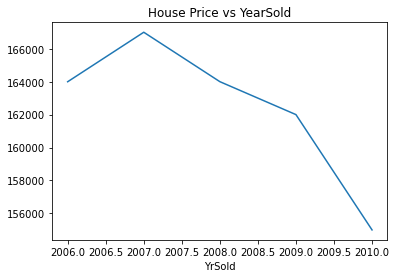

In [18]:
## lets analysis the relationship between the sale price and year sold

## we need to use median bcz we may have outliers so it's better to use median instead of mean
df.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel("sale price")
plt.xlabel('YrSold')
plt.title("House Price vs YearSold")

#### in order to get simple value in  number instead of years we are just minus the feature value from yr sold 
#### let say the house is modified in 2003 and sold in 2006 so 2006-2003 = 3 years

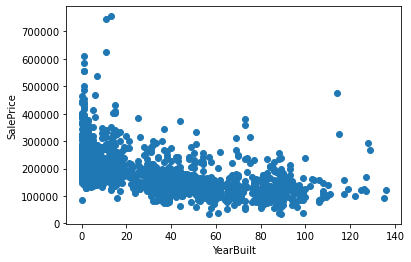

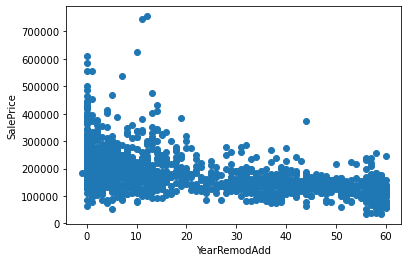

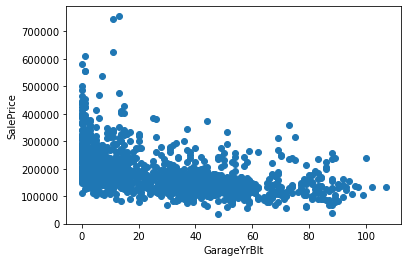

In [25]:
data = df.copy()
for features in years_columns:
    if features != 'YrSold':
        data[features] = df['YrSold']-data[features]
        plt.scatter(data[features], data['SalePrice'])
        
        ## we will use scatter plot bcs here we have so much values
        ##data.groupby(features)['SalePrice'].median().plot.bar()
        plt.xlabel(features)
        plt.ylabel('SalePrice')
        plt.show()
        

### We normally have two types of numerical variable 
### 1. Continous variable and Discrete Variables

### let find the discrete variables and we decide a threshold of 20 unique values

In [33]:
discrete_variables = [features for features in numerical_values_columns if len(df[features].unique())<25 and features not in years_columns+['Id']]

In [34]:
print(len(discrete_variables))
df[discrete_variables]

17


,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,6,5,0,0,0,2,1,3,1,7,1,2,0,0,0,8
1456,20,6,6,0,1,0,2,0,3,1,7,2,2,0,0,0,2
1457,70,7,9,0,0,0,2,0,4,1,9,2,1,0,0,2500,5
1458,20,5,6,0,1,0,1,0,2,1,5,0,1,0,0,0,4


### these are discrete variables so we need to check relationship using bar plot

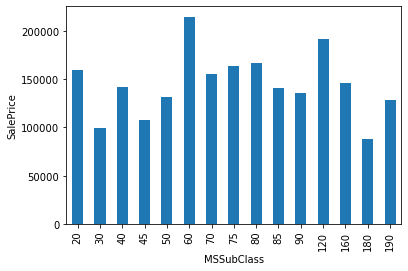

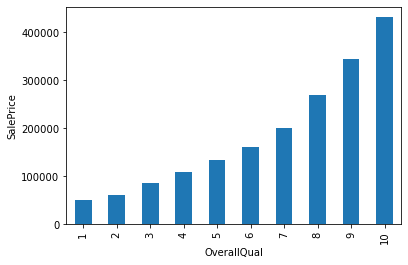

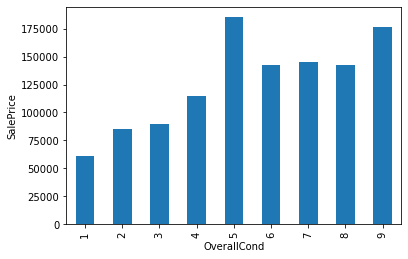

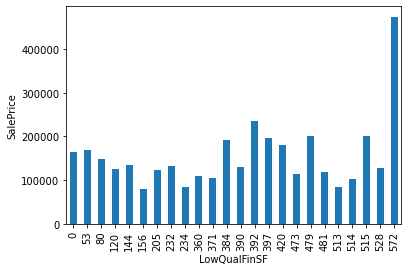

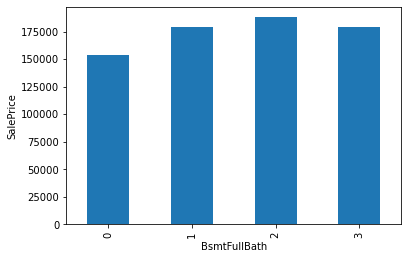

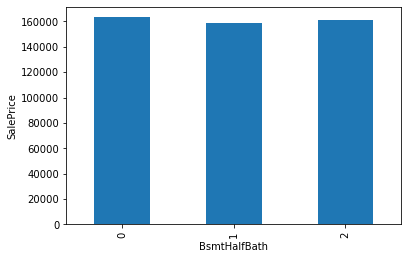

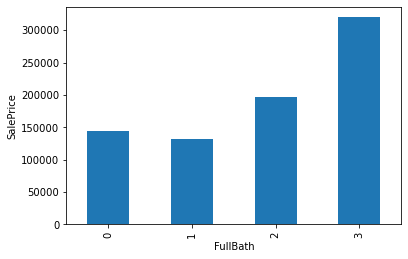

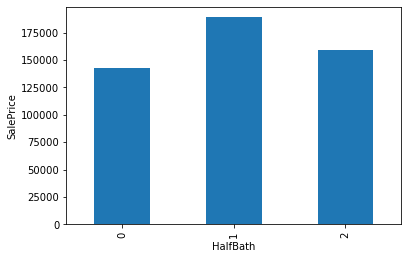

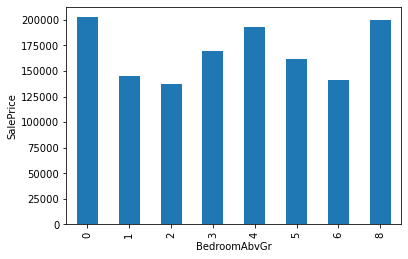

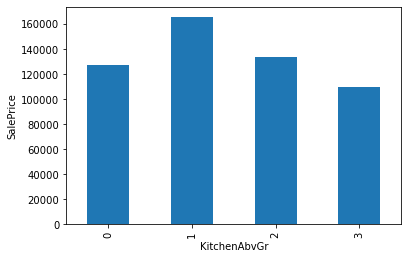

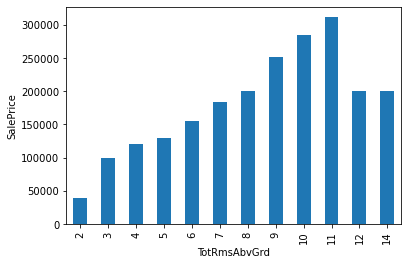

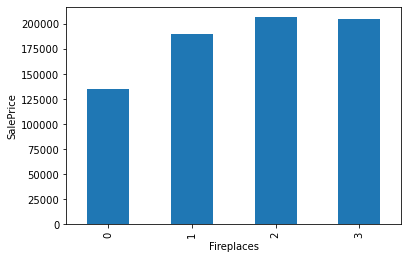

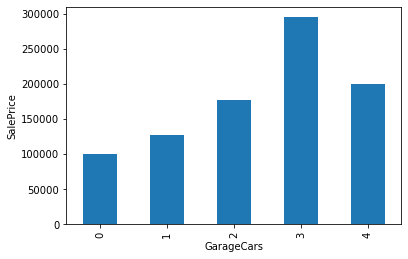

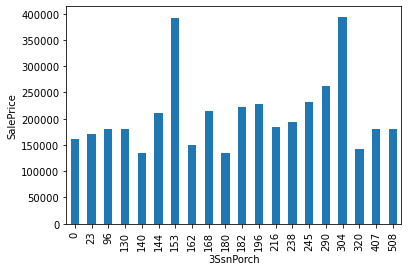

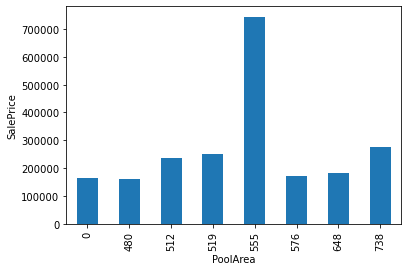

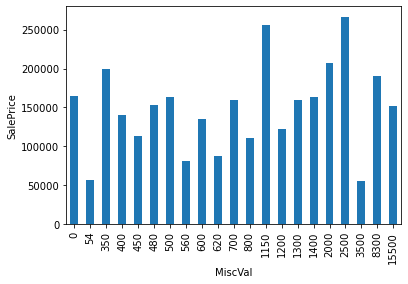

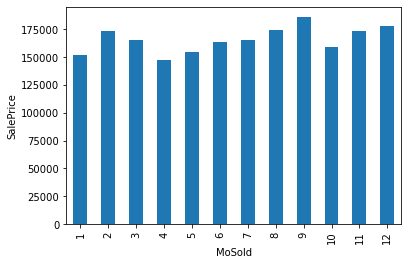

In [36]:
for features in:
    data = df.copy()
    data.groupby(features)['SalePrice'].median().plot.bar()
    plt.xlabel(features)
    plt.ylabel('SalePrice')
    
    ## if we want to show all the plots we need to use show fn
    plt.show()

### here in the second plot, we have exponential growth means that if quality is high than price will be high too 
#### this type of relationship also called as a mono-atomic relationship 

# Continoues Variables

In [45]:
continous_column = [features for features in numerical_values_columns if features not in discrete_variables and features not in years_columns+['Id']]

In [46]:
len(continous_column)

16

## For continous Variables we use histogram

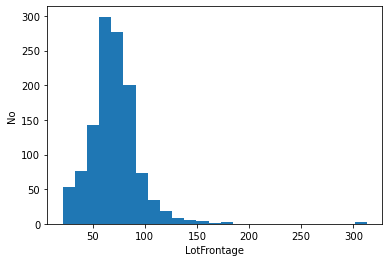

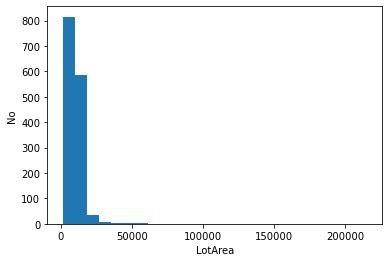

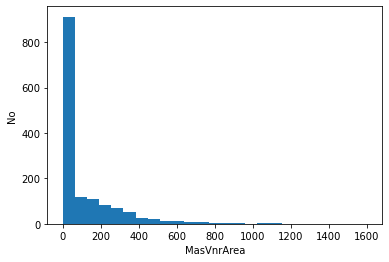

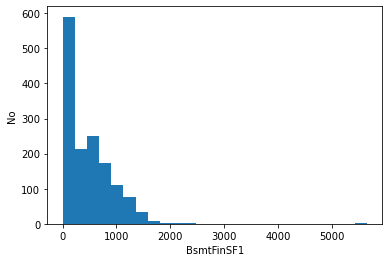

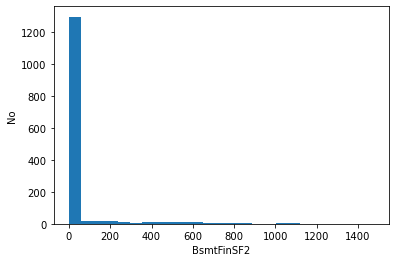

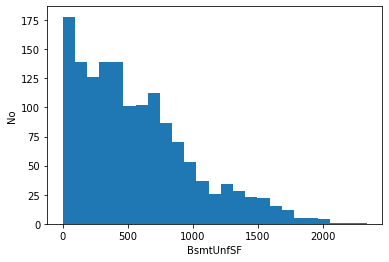

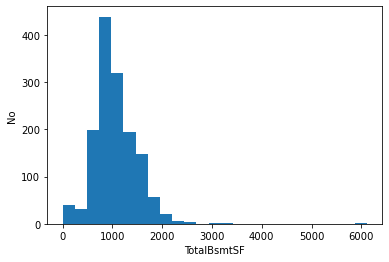

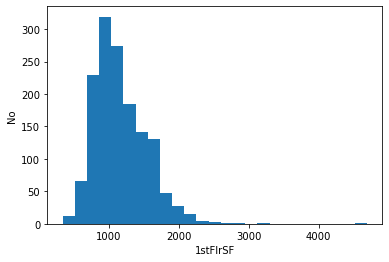

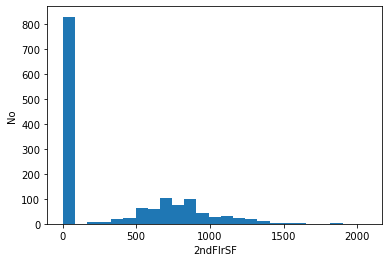

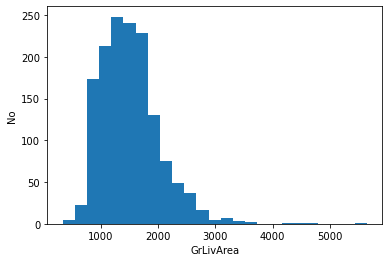

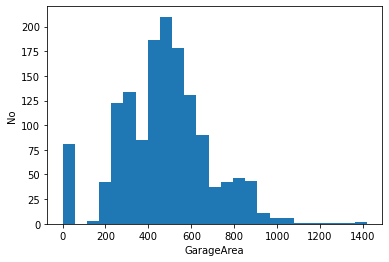

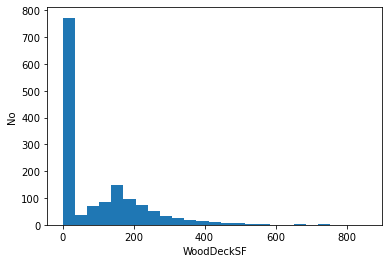

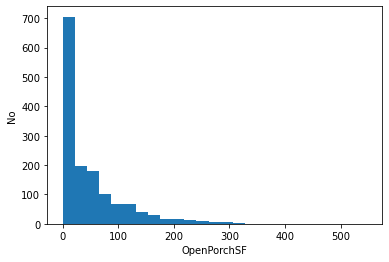

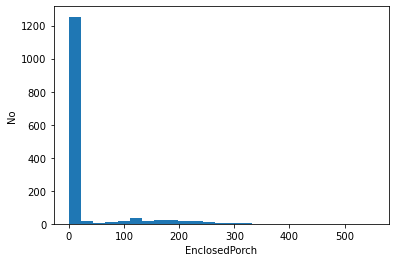

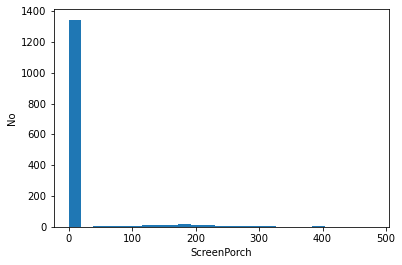

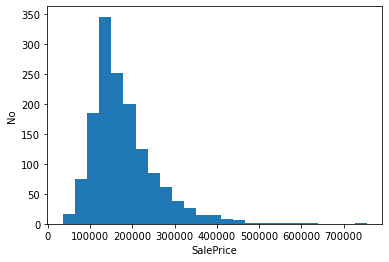

In [48]:
for features in continous_column:
    plt.hist(df[features],bins = 25)
    plt.xlabel(features)
    plt.ylabel('No')
    plt.show()

## here in case of continous values we want guassian distribution or normal distribution but in our case we have 

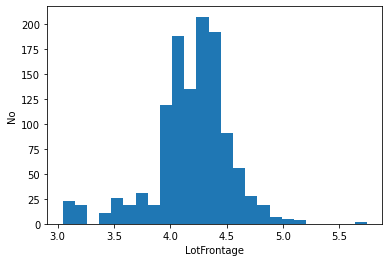

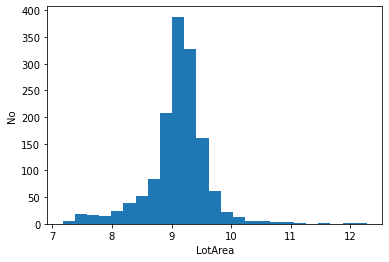

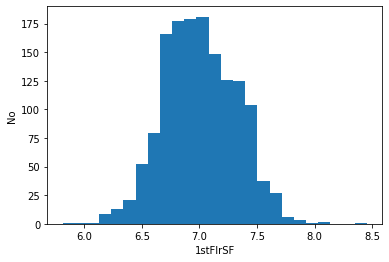

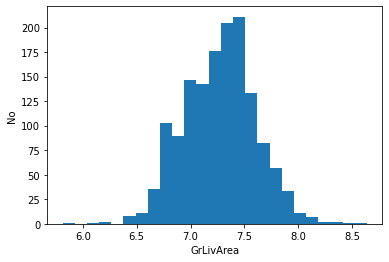

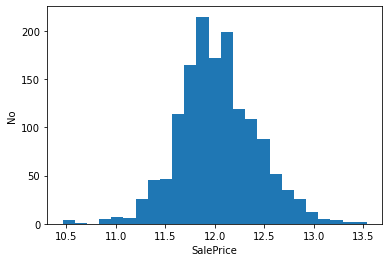

In [53]:
for features in continous_column:
    data = df.copy()
    if 0 in data[features].unique():
        pass
    else:
        data[features] = np.log(data[features])
        plt.hist(data[features],bins = 25)
        plt.xlabel(features)
        plt.ylabel('No')
        plt.show()

### Let's View the above in Scatter plot to find relationship (As it's a regression problem that's why scatter convey more info)

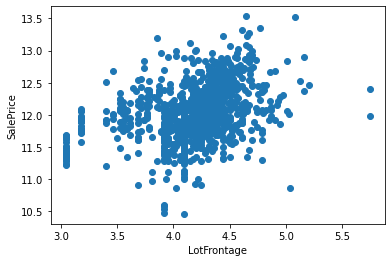

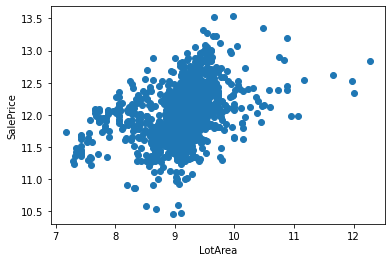

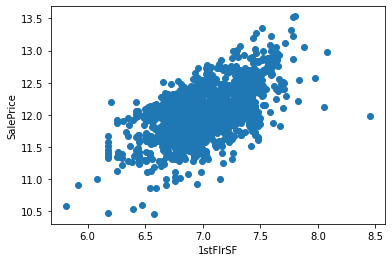

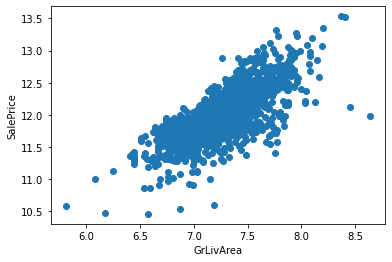

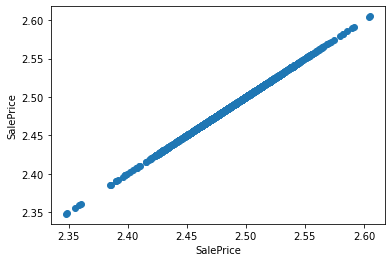

In [50]:
for features in continous_column:
    data = df.copy()
    if 0 in data[features].unique():
        pass
    else:
        data[features] = np.log(data[features])
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[features], data['SalePrice'])
        plt.xlabel(features)
        plt.ylabel('SalePrice')
        plt.show()
    

## We do have outliers 
#### we use box plot we can seaborn or our pandas df too have this plot 

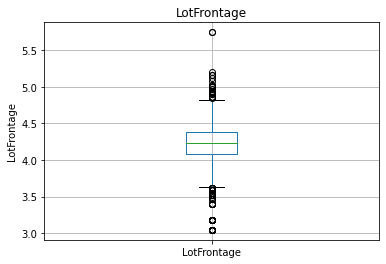

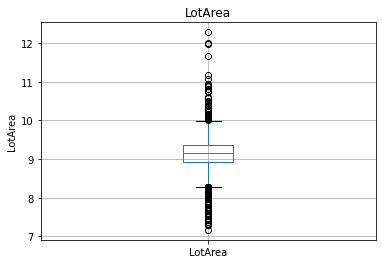

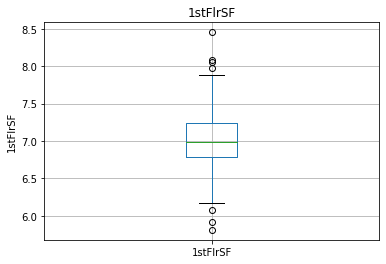

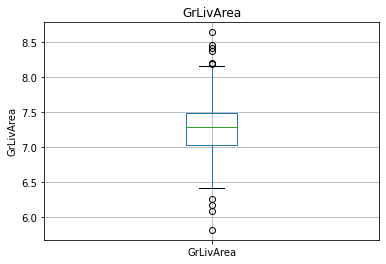

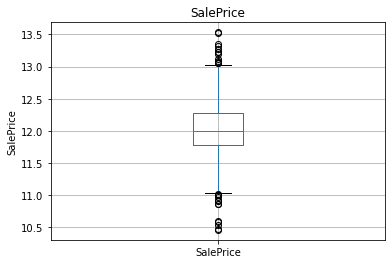

In [63]:
for features in continous_column:
    data = df.copy()
    if 0 in data[features].unique():
        pass
    else:
        data[features]= np.log(data[features])
        data.boxplot(column = features)
        plt.title(features)
        plt.ylabel(features)
        plt.show()

## Categorical Variables 

In [56]:
Categorical_column = [features for features in df.columns if df[features].dtype == "O"]

In [57]:
len(Categorical_column)
df[Categorical_column]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [64]:
for features in Categorical_column:
    print('No of Categories in {} is {}'.format(features, len(df[features].unique())))

No of Categories in MSZoning is 5
No of Categories in Street is 2
No of Categories in Alley is 3
No of Categories in LotShape is 4
No of Categories in LandContour is 4
No of Categories in Utilities is 2
No of Categories in LotConfig is 5
No of Categories in LandSlope is 3
No of Categories in Neighborhood is 25
No of Categories in Condition1 is 9
No of Categories in Condition2 is 8
No of Categories in BldgType is 5
No of Categories in HouseStyle is 8
No of Categories in RoofStyle is 6
No of Categories in RoofMatl is 8
No of Categories in Exterior1st is 15
No of Categories in Exterior2nd is 16
No of Categories in MasVnrType is 5
No of Categories in ExterQual is 4
No of Categories in ExterCond is 5
No of Categories in Foundation is 6
No of Categories in BsmtQual is 5
No of Categories in BsmtCond is 5
No of Categories in BsmtExposure is 5
No of Categories in BsmtFinType1 is 7
No of Categories in BsmtFinType2 is 7
No of Categories in Heating is 6
No of Categories in HeatingQC is 5
No of Cat

### Here the collumns with less number of categories can be deal with the one hot encoding but the columns with the higher number of categories need a speical treatment

### let's check the relationship with SalePrice

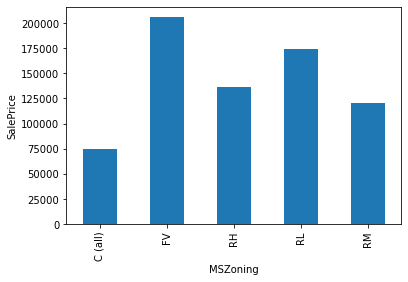

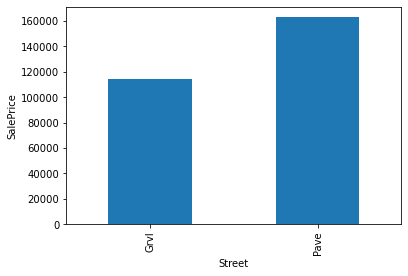

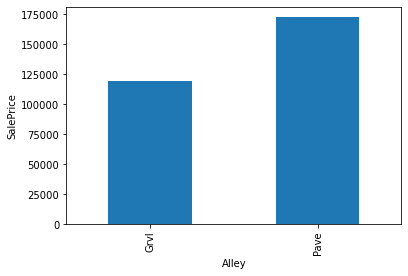

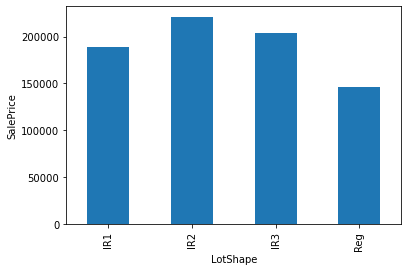

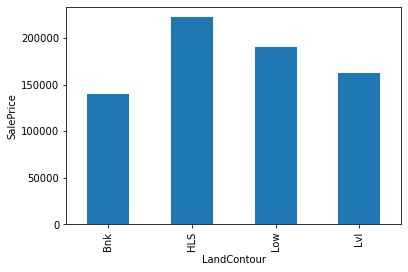

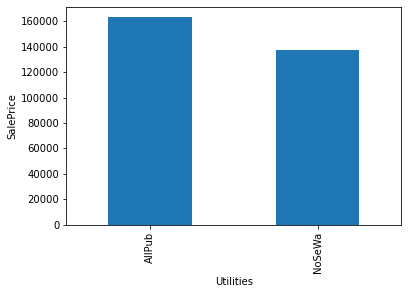

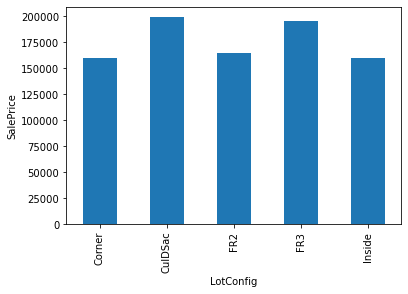

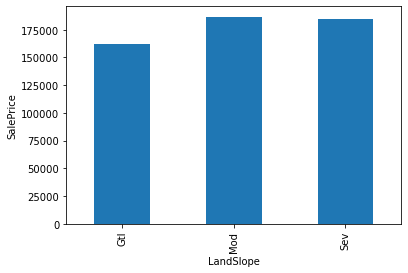

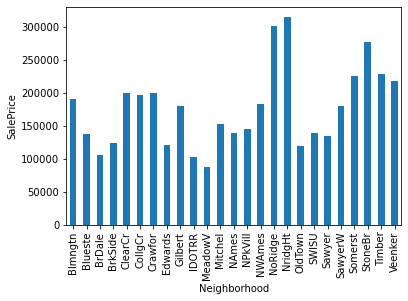

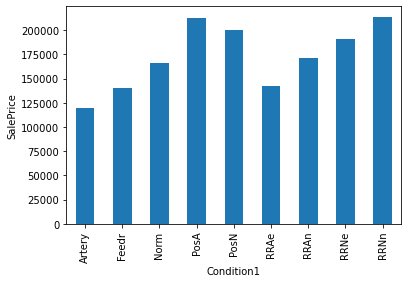

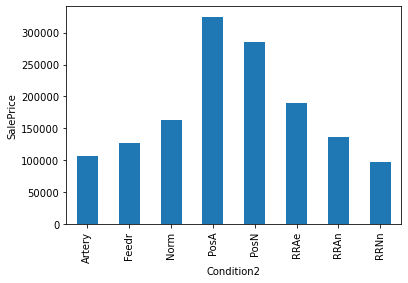

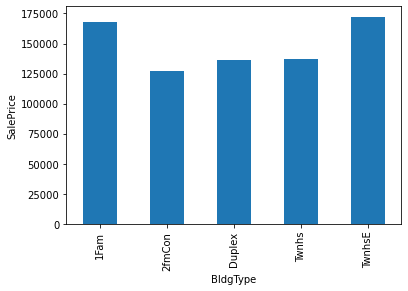

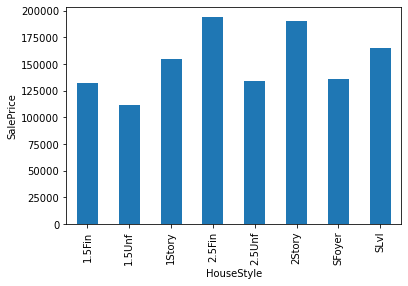

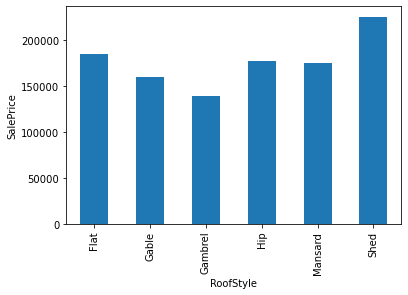

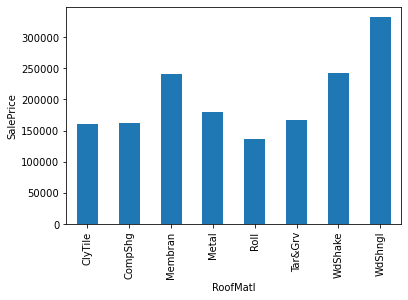

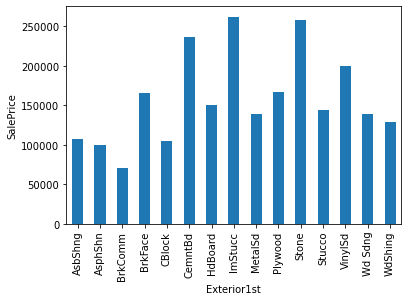

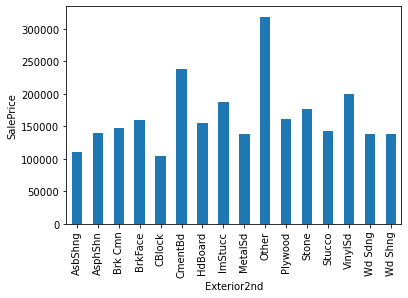

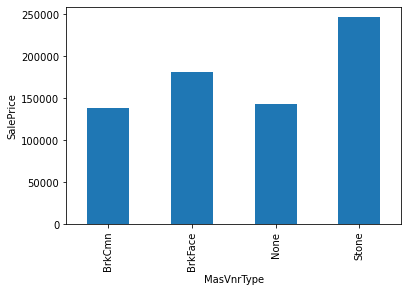

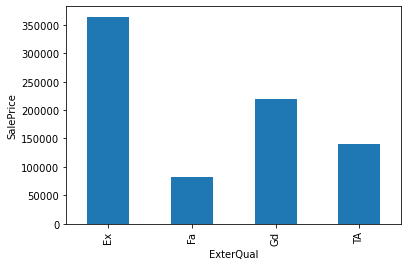

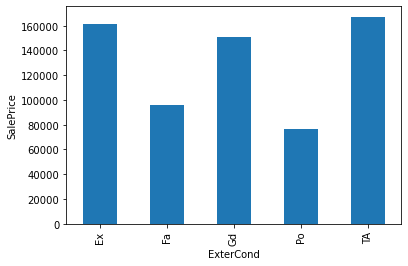

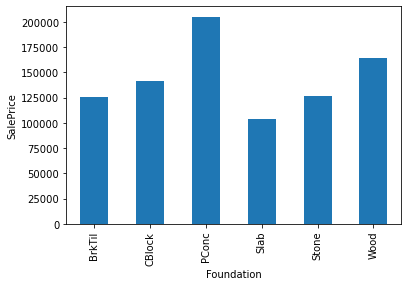

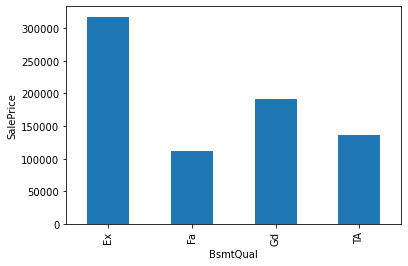

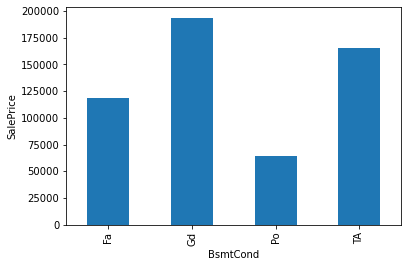

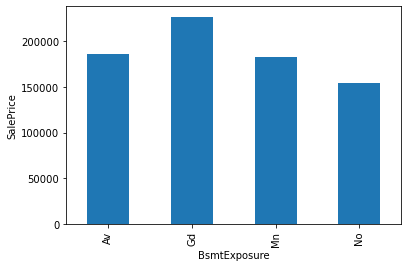

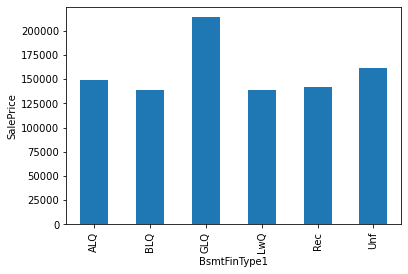

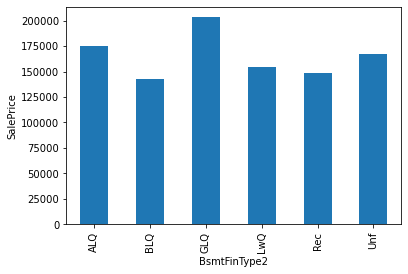

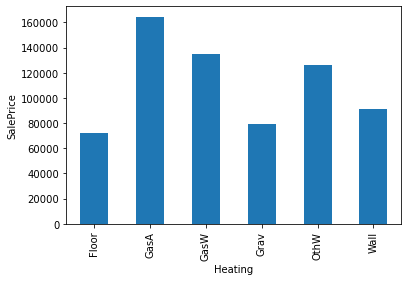

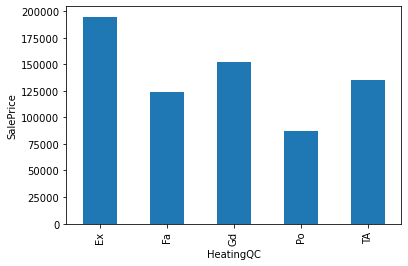

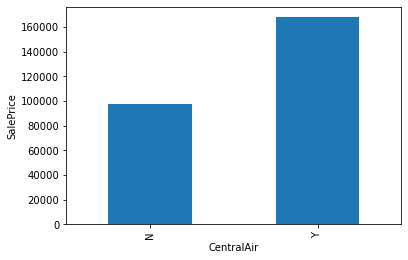

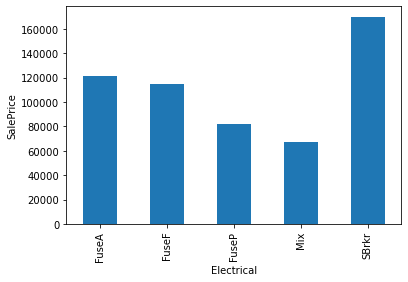

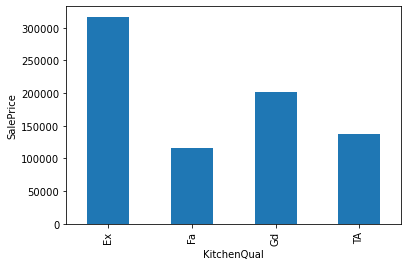

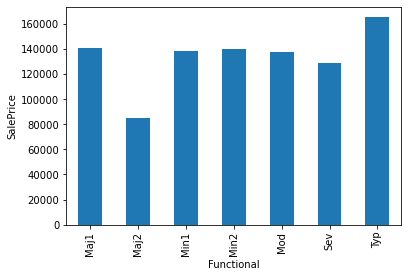

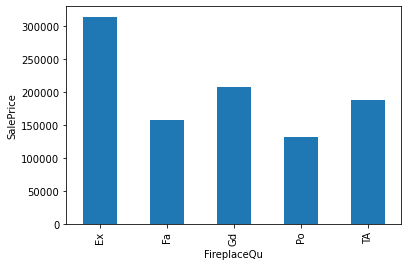

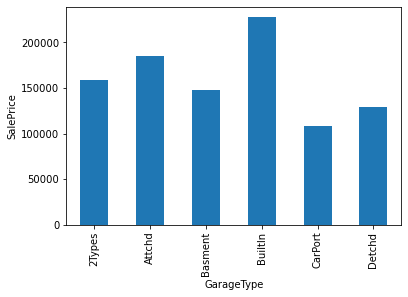

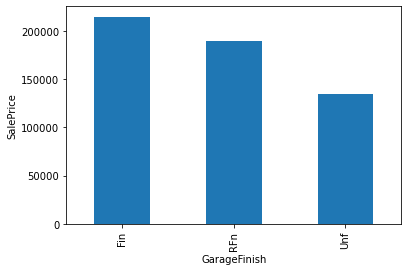

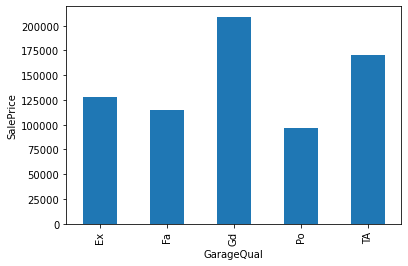

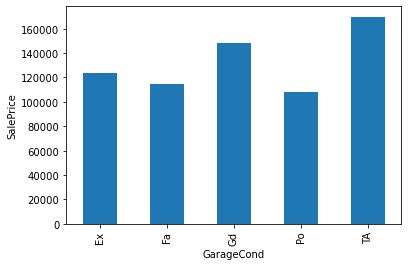

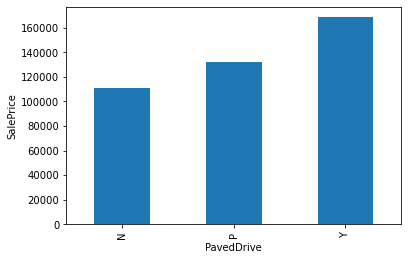

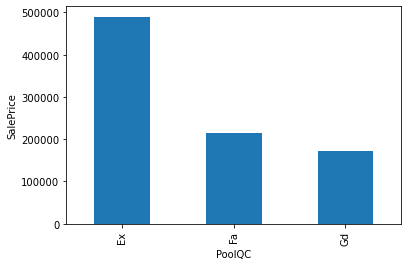

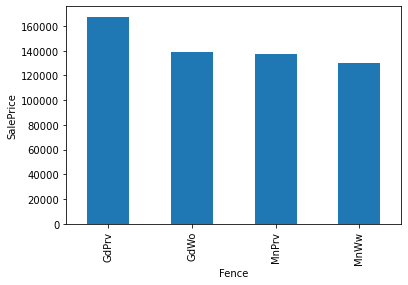

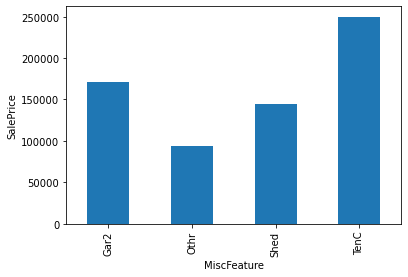

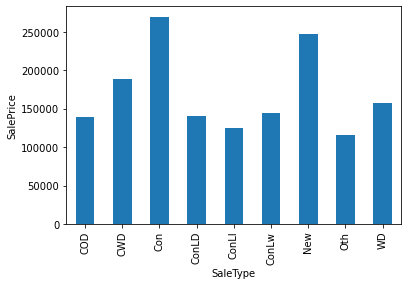

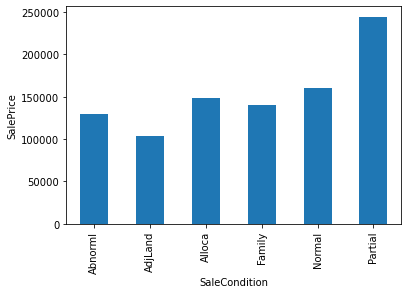

In [67]:
for features in Categorical_column:
    data = df.copy()
    data.groupby(features)['SalePrice'].median().plot.bar()
    plt.xlabel(features)
    plt.ylabel('SalePrice')
    plt.show()